### SETUP CSV

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("banana.csv")
df

,Unnamed: 0,Acidity,Weight,Length,Appearance,Tannin,Ripeness,Sweetness,Country_of_Origin,Firmness,Grade,Price
0,0,5.977114,149.825704,49.249144,3.770162,8.092385,6.916558,6.763285,Costa Rica,0.370053,A,20075.252141
1,1,8.625523,150.759254,50.048300,6.007516,7.400025,6.706338,6.481902,Costa Rica,0.560635,A,20016.601326
2,2,8.813012,148.780694,49.865871,5.166949,6.861433,6.607327,5.702631,Costa Rica,0.373475,C,20123.529719
3,3,7.496444,152.329626,49.676489,5.451806,7.342269,6.482970,6.265227,Colombia,0.490814,A,20055.353632
4,4,6.885109,150.412228,50.526268,3.872441,7.630643,6.064423,6.856929,Colombia,0.826858,A,20003.643981
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,6.642403,151.039757,50.238865,4.867772,9.091904,7.985697,6.804132,Costa Rica,0.500176,A,19921.061841
1996,1996,7.653993,151.431401,49.132623,5.734657,8.231696,6.854072,6.806902,Colombia,0.706189,B,19875.326652
1997,1997,8.591312,150.018217,47.992948,3.827522,8.015240,6.696851,6.129531,Costa Rica,0.864229,B,19998.199999
1998,1998,7.854793,149.431460,50.440215,3.479959,8.493746,6.286329,6.463142,Ecuador,0.658963,B,20029.421471


### SOAL NO 1

In [23]:
# Deskripsi statistik numerik
deskripsi_numerik = df.describe()

# Menghitung IQR
IQR = deskripsi_numerik.loc['75%'] - deskripsi_numerik.loc['25%']

# Menambahkan modus, skewness, dan kurtosis untuk data numerik
modus = df.select_dtypes(include=[np.number]).mode().iloc[0]
skewness = df.select_dtypes(include=[np.number]).skew()
kurtosis = df.select_dtypes(include=[np.number]).kurt()
variansi = df.select_dtypes(include=[np.number]).var()
range_value = df.select_dtypes(include=[np.number]).max() - df.select_dtypes(include=[np.number]).min()

# Menggabungkan semua statistik ke dalam satu DataFrame untuk data numerik
statistik_lengkap = deskripsi_numerik.append([modus, skewness, kurtosis, variansi, range_value, IQR], ignore_index=True)
statistik_lengkap.index = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'mode', 'skew', 'kurt', 'var', 'range', 'IQR']

# Menghitung jumlah nilai unik dan proporsi untuk kolom 'country' dan 'origin'
unik_country = df['Country_of_Origin'].nunique()
proporsi_country = df['Country_of_Origin'].value_counts(normalize=True)
unik_grade = df['Grade'].nunique()
proporsi_grade = df['Grade'].value_counts(normalize=True)

print("Deskripsi Statistik Numerik:\n", statistik_lengkap)
print("\nJumlah Nilai Unik untuk 'Country_of_Origin':", unik_country)
print("\nProporsi Nilai untuk 'Country_of_Origin':")
print(proporsi_country.to_string())
print("\nJumlah Nilai Unik untuk 'Grade':", unik_grade)
print("\nProporsi Nilai untuk 'Grade':")
print(proporsi_grade.to_string())

Deskripsi Statistik Numerik:
           Unnamed: 0      Acidity       Weight       Length   Appearance  \
count    2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      999.500000     8.014830   150.011549    49.950434     4.965595   
std       577.494589     1.105781     1.194980     0.894599     1.014863   
min         0.000000     4.456118   146.060922    46.418052     1.775864   
25%       499.750000     7.259942   149.227116    49.346508     4.258210   
50%       999.500000     8.005347   150.022865    49.923682     4.979534   
75%      1499.250000     8.758361   150.827613    50.572027     5.653875   
max      1999.000000    11.418636   154.070370    53.065151     8.233968   
mode        0.000000     4.456118   146.060922    46.418052     1.775864   
skew        0.000000     0.056793    -0.084767     0.026878    -0.035389   
kurt       -1.200000    -0.147134     0.024967    -0.053550    -0.002189   
var    333500.000000     1.222752     1.427977     0.80030

/var/folders/rf/505x6jx91s3c_9bcpbpv2bw40000gn/T/ipykernel_66269/2215186902.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistik_lengkap = deskripsi_numerik.append([modus, skewness, kurtosis, variansi, range_value, IQR], ignore_index=True)


### SOAL NO 2

In [8]:
print("Pada file banana.csv, terdapat data yang rusak pada kolom 'Country_of_Origin' dan kolom 'Price'.") 
print("Data rusak pada kolom 'Country_of_Origin' adalah adanya negara yang namanya undefined.")
print("Data rusak pada kolom 'Price' adalah adanya price yang nilainya -1.")



Pada file banana.csv, terdapat data yang rusak pada kolom 'Country_of_Origin' dan kolom 'Price'.
Data rusak pada kolom 'Country_of_Origin' adalah adanya negara yang namanya undefined.
Data rusak pada kolom 'Price' adalah adanya price yang nilainya -1.


In [28]:
# To drop row
df = df[df['Country_of_Origin'] != 'undefined']
df = df[df['Price'] != -1]

# Deskripsi statistik numerik baru
deskripsi_numerik = df.describe()

# Menghitung IQR
IQR = deskripsi_numerik.loc['75%'] - deskripsi_numerik.loc['25%']

# Menambahkan modus, skewness, dan kurtosis untuk data numerik
modus = df.select_dtypes(include=[np.number]).mode().iloc[0]
skewness = df.select_dtypes(include=[np.number]).skew()
kurtosis = df.select_dtypes(include=[np.number]).kurt()
variansi = df.select_dtypes(include=[np.number]).var()
range_value = df.select_dtypes(include=[np.number]).max() - df.select_dtypes(include=[np.number]).min()

# Menggabungkan semua statistik ke dalam satu DataFrame untuk data numerik
statistik_lengkap = deskripsi_numerik.append([modus, skewness, kurtosis, variansi, range_value, IQR], ignore_index=True)
statistik_lengkap.index = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'mode', 'skew', 'kurt', 'var', 'range', 'IQR']

# Menghitung jumlah nilai unik dan proporsi untuk kolom 'country' dan 'origin'
unik_country = df['Country_of_Origin'].nunique()
proporsi_country = df['Country_of_Origin'].value_counts(normalize=True)
unik_grade = df['Grade'].nunique()
proporsi_grade = df['Grade'].value_counts(normalize=True)

print("Deskripsi Statistik Numerik:\n", statistik_lengkap)
print("\nJumlah Nilai Unik untuk 'Country_of_Origin':", unik_country)
print("\nProporsi Nilai untuk 'Country_of_Origin':")
print(proporsi_country.to_string())
print("\nJumlah Nilai Unik untuk 'Grade':", unik_grade)
print("\nProporsi Nilai untuk 'Grade':")
print(proporsi_grade.to_string())

Deskripsi Statistik Numerik:
           Unnamed: 0      Acidity       Weight       Length   Appearance  \
count    1996.000000  1996.000000  1996.000000  1996.000000  1996.000000   
mean      999.312124     8.015316   150.008369    49.950197     4.965374   
std       577.551408     1.106237     1.192794     0.894835     1.015430   
min         0.000000     4.456118   146.060922    46.418052     1.775864   
25%       499.750000     7.259942   149.224671    49.343458     4.258210   
50%       999.500000     8.006202   150.020803    49.925757     4.978272   
75%      1499.250000     8.758361   150.826972    50.572027     5.653875   
max      1999.000000    11.418636   154.070370    53.065151     8.233968   
mode        0.000000     4.456118   146.060922    46.418052     1.775864   
skew       -0.000139     0.055364    -0.090547     0.025869    -0.034925   
kurt       -1.200104    -0.147101     0.021106    -0.053852    -0.003641   
var    333565.629347     1.223761     1.422759     0.80073

/var/folders/rf/505x6jx91s3c_9bcpbpv2bw40000gn/T/ipykernel_66269/908530536.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistik_lengkap = deskripsi_numerik.append([modus, skewness, kurtosis, variansi, range_value, IQR], ignore_index=True)


In [27]:
# Mengidentifikasi kolom numerik
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Dictionary untuk menyimpan data outliers
outliers_dict = {}

# Melakukan iterasi pada setiap kolom numerik untuk menghitung IQR dan menentukan outliers
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    filter = (df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))
    outliers_dict[col] = df[filter]

print (outliers_dict)

{'Unnamed: 0': Empty DataFrame
Columns: [Unnamed: 0, Acidity, Weight, Length, Appearance, Tannin, Ripeness, Sweetness, Country_of_Origin, Firmness, Grade, Price]
Index: [], 'Acidity':       Unnamed: 0    Acidity      Weight     Length  Appearance    Tannin  \
148          148  11.191852  150.256022  50.119257    4.942644  9.250504   
209          209  11.119288  149.503955  49.116418    5.564729  7.774533   
279          279  11.137342  151.153362  48.945558    7.169523  7.850270   
289          289  11.024219  149.503132  49.721594    4.516512  8.799761   
345          345  11.079811  150.694486  50.443629    6.271014  6.655897   
349          349  11.418636  149.637414  49.990743    4.561794  8.138369   
683          683  11.026875  149.985424  47.968120    5.256250  7.845386   
819          819   4.897068  148.645403  47.777948    3.835939  7.077435   
966          966   4.456118  149.196339  51.001221    4.780454  9.889702   
1040        1040   4.896538  150.590273  50.758289    3.

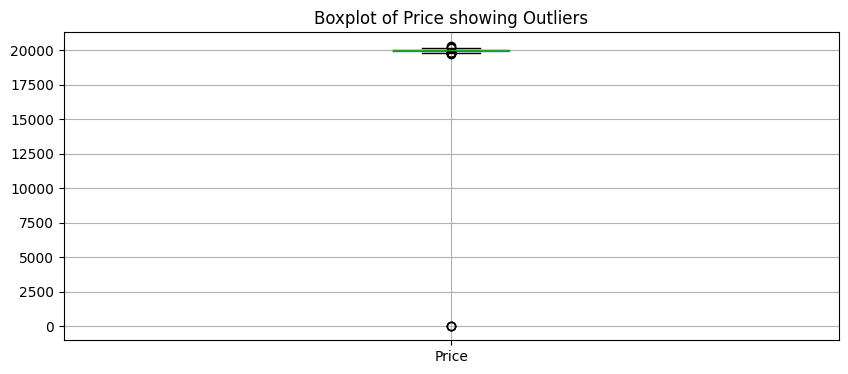

In [26]:
plt.figure(figsize=(10, 4))
df.boxplot(column=[col])
plt.title(f'Boxplot of {col} showing Outliers')
plt.show()

### SOAL NO 3